In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re 
import cv2
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import Sequential, Input, Model
from keras.layers import BatchNormalization
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [3]:
#Directorio de entrenamiento y prueba
train_dataset = 'Train/'
test_dataset = 'Test/'

#dimensiones de las imágenes
height = 128
width = 128

BATCH_SIZE = 128

#Obtener lista de los nombres de las clases
class_names = os.listdir(train_dataset)
num_classes = len(class_names)

In [4]:
#División de train y test
training = tf.keras.utils.image_dataset_from_directory(directory=train_dataset,
                                                       subset = "training",
                                                       class_names=os.listdir(train_dataset),
                                                       batch_size=BATCH_SIZE,
                                                       validation_split=0.2,
                                                       image_size=(height,width), #resize de las imagenes a (128,128)
                                                       seed=42)

validation = tf.keras.utils.image_dataset_from_directory(directory=train_dataset,
                                                       subset = "validation",
                                                       class_names=os.listdir(train_dataset), 
                                                       batch_size=BATCH_SIZE,
                                                       validation_split=0.2,
                                                       image_size=(height, width),
                                                       seed=42)

Found 21902 files belonging to 9 classes.
Using 17522 files for training.
Found 21902 files belonging to 9 classes.
Using 4380 files for validation.


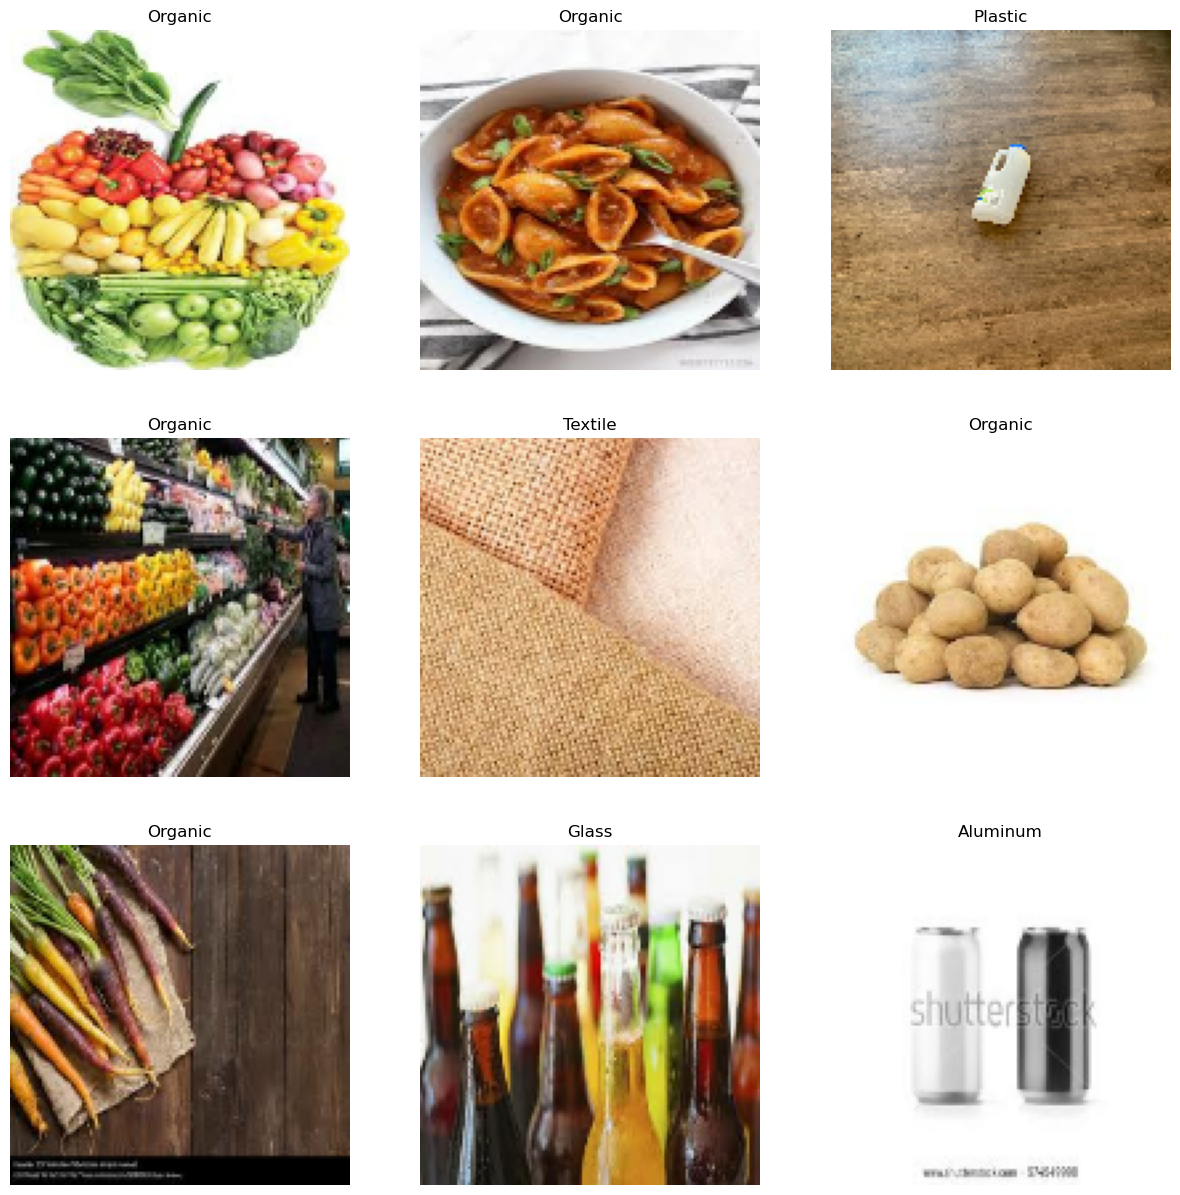

In [44]:
#Plot de algunas imagenes con las etiquetas de clasificación
plt.figure(figsize=(15, 15))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [16]:
# Directorios de entrenamiento y prueba
train_dataset = 'Train/'
test_dataset = 'Test/'

# Dimensiones de las imágenes
height = 128
width = 128

# Tamaño del lote (batch size)
batch_size = 32

# Obtener la lista de nombres de clases
class_names = os.listdir(train_dataset)
num_classes = len(class_names)

# Augmentation, rangos de augmentation para la transformación de las imagenes
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dataset,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generador de datos de validación
validation_generator = train_datagen.flow_from_directory(
    directory=train_dataset,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 17525 images belonging to 9 classes.
Found 4377 images belonging to 9 classes.


In [18]:
# Aumento de número de épocas
epochs = 30

# Definición y ajuste del nuevo modelo
model3 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])



In [19]:
# Ajustar hiperparámetros
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compilación y entrenamiento del modelo
model3.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [21]:
mcp_save = ModelCheckpoint('Models\my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
history = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[earlyStopping, mcp_save] 
)


Epoch 1/30
547/547 [==============================] - 849s 2s/step - loss: 1.5471 - accuracy: 0.5366 - val_loss: 1.5702 - val_accuracy: 0.5370
Epoch 2/30
547/547 [==============================] - 766s 1s/step - loss: 1.5357 - accuracy: 0.5367 - val_loss: 1.5270 - val_accuracy: 0.5375
Epoch 3/30
547/547 [==============================] - 815s 1s/step - loss: 1.5315 - accuracy: 0.5368 - val_loss: 1.5691 - val_accuracy: 0.5368
Epoch 4/30
547/547 [==============================] - 854s 2s/step - loss: 1.5294 - accuracy: 0.5368 - val_loss: 1.5447 - val_accuracy: 0.5375
Epoch 5/30
547/547 [==============================] - 845s 2s/step - loss: 1.5278 - accuracy: 0.5370 - val_loss: 1.5622 - val_accuracy: 0.5372
Epoch 6/30
547/547 [==============================] - 789s 1s/step - loss: 1.5295 - accuracy: 0.5366 - val_loss: 1.5451 - val_accuracy: 0.5377
Epoch 7/30
547/547 [==============================] - 775s 1s/step - loss: 1.5285 - accuracy: 0.5366 - val_loss: 1.5256 - val_accuracy: 0.5375

Modelo 3

In [22]:
# Directorios de entrenamiento y prueba
train_dataset = 'Train/'
test_dataset = 'Test/'

# Dimensiones de las imágenes
height = 128
width = 128

# Tamaño del lote (batch size)
batch_size = 128

# Obtener la lista de nombres de clases
class_names = os.listdir(train_dataset)
num_classes = len(class_names)

# Augmentation, rangos de augmentation para la transformación de las imagenes
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dataset,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generador de datos de validación
validation_generator = train_datagen.flow_from_directory(
    directory=train_dataset,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 17525 images belonging to 9 classes.
Found 4377 images belonging to 9 classes.


In [23]:
#Aumento de épocas
epochs = 30

# Definición y ajuste del nuevo modelo
model4 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

In [24]:
# Ajustar hiperparámetros
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compilación y entrenamiento del modelo
model4.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [25]:
mcp_save = ModelCheckpoint('Models\my_model2.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

history = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[earlyStopping, mcp_save] 
)


Epoch 1/30
136/136 [==============================] - 504s 4s/step - loss: 1.5195 - accuracy: 0.5345 - val_loss: 1.5492 - val_accuracy: 0.5370
Epoch 2/30
136/136 [==============================] - 501s 4s/step - loss: 1.3244 - accuracy: 0.5557 - val_loss: 1.2754 - val_accuracy: 0.5301
Epoch 3/30
136/136 [==============================] - 471s 3s/step - loss: 1.2776 - accuracy: 0.5682 - val_loss: 1.2726 - val_accuracy: 0.5439
Epoch 4/30
136/136 [==============================] - 473s 3s/step - loss: 1.2679 - accuracy: 0.5742 - val_loss: 1.2720 - val_accuracy: 0.5349
Epoch 5/30
136/136 [==============================] - 488s 4s/step - loss: 1.2416 - accuracy: 0.5812 - val_loss: 1.2914 - val_accuracy: 0.5427
Epoch 6/30
136/136 [==============================] - 494s 4s/step - loss: 1.2151 - accuracy: 0.5927 - val_loss: 1.1923 - val_accuracy: 0.5712
Epoch 7/30
136/136 [==============================] - 502s 4s/step - loss: 1.1639 - accuracy: 0.6102 - val_loss: 1.2173 - val_accuracy: 0.5754

In [26]:
#Summary
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, None, None, None)  0         
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 64)    1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, None, None, 128)   73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, None, None, 128)  0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, None, None, 256)  

In [27]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.519511,0.534517,1.549198,0.536994
1,1.324450,0.555670,1.275393,0.530101
2,1.277579,0.568201,1.272559,0.543888
3,1.267856,0.574179,1.272010,0.534926
4,1.241649,0.581192,1.291356,0.542739
5,1.215075,0.592688,1.192278,0.571232
6,1.163889,0.610163,1.217331,0.575368
7,1.118068,0.626832,1.130408,0.598116
8,1.073560,0.641950,1.107833,0.616958
9,1.038863,0.653561,1.059987,0.623392


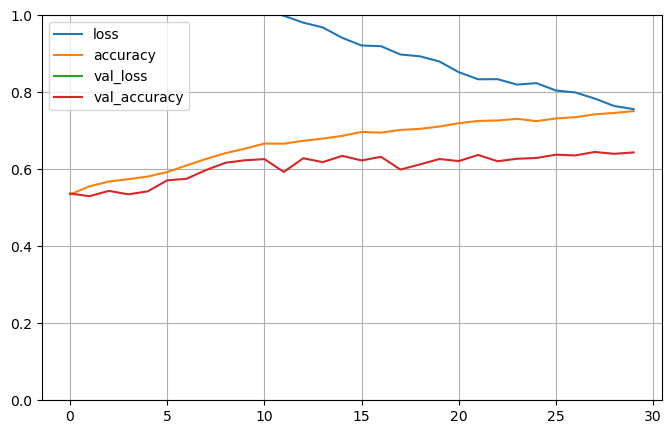

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [51]:
# Generador de datos de prueba
test_generator = train_datagen.flow_from_directory(
    directory=test_dataset,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # Asegura que las predicciones y etiquetas se mantengan en orden
    color_mode='rgb'  # Especifica el modo de color de las imágenes (RGB)
)

Found 7173 images belonging to 9 classes.


In [62]:
# Cargar el modelo guardado con ModelCheckpoint
model4 = tf.keras.models.load_model('my_model2.json')
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model4.load_weights('my_model2.json')

ValueError: The channel dimension of the inputs should be defined. The input_shape received is (None, None, None, None), where axis -1 (0-based) is the channel dimension, which found to be `None`.

In [63]:
# Realizar predicciones en el conjunto de prueba
predictions = model4.predict(test_generator)

# Obtener las etiquetas predichas y las etiquetas verdaderas
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Calcular la precisión (accuracy) del modelo en el conjunto de prueba
accuracy = np.mean(predicted_labels == true_labels)

print("Accuracy en el conjunto de prueba:", accuracy)

 7/57 [==>...........................] - ETA: 1:41

KeyboardInterrupt: 

In [ ]:
# Obtener las etiquetas verdaderas
true_labels = test_generator.classes

# Obtener las etiquetas predichas
predicted_labels = np.argmax(predictions, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Obtener los nombres de las clases
class_names = list(test_generator.class_indices.keys())

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()


Modelo 2

In [62]:
# Definición del modelo
model2 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compilación y entrenamiento del modelo
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [63]:
epochs = 15

history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/15
136/136 [==============================] - 412s 3s/step - loss: 1.6081 - accuracy: 0.5329 - val_loss: 1.5012 - val_accuracy: 0.5370
Epoch 2/15
136/136 [==============================] - 303s 2s/step - loss: 1.4782 - accuracy: 0.5368 - val_loss: 1.3589 - val_accuracy: 0.5379
Epoch 3/15
136/136 [==============================] - 299s 2s/step - loss: 1.3624 - accuracy: 0.5505 - val_loss: 1.2814 - val_accuracy: 0.5377
Epoch 4/15
136/136 [==============================] - 298s 2s/step - loss: 1.3091 - accuracy: 0.5668 - val_loss: 1.2802 - val_accuracy: 0.5411
Epoch 5/15
136/136 [==============================] - 306s 2s/step - loss: 1.3109 - accuracy: 0.5656 - val_loss: 1.2482 - val_accuracy: 0.5473
Epoch 6/15
136/136 [==============================] - 328s 2s/step - loss: 1.2746 - accuracy: 0.5745 - val_loss: 1.2404 - val_accuracy: 0.5556
Epoch 7/15
136/136 [==============================] - 308s 2s/step - loss: 1.2641 - accuracy: 0.5759 - val_loss: 1.2560 - val_accuracy: 0.5443

Primer modelo de prueba

In [55]:
data_augmentation = tf.keras.Sequential([
    keras.layers.Rescaling(1./255),
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2), # Fraction of 2Pi
    keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    keras.layers.RandomBrightness(factor=0.2),
    keras.layers.RandomContrast(factor=0.2)
])


In [56]:
new_train = training.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=tf.data.AUTOTUNE)
new_train = new_train.prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
#Modelo prueba 
waste_model3 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [65]:
waste_model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])